In [1]:
import numpy as np
import time as tm
#This cell sets up basic plotting functions awe
#we will use to visualize the gradient descent routines.

#Make plots interactive
#%matplotlib notebook

#Make plots static
%matplotlib inline

#Make 3D plots
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
#from matplotlib import animation
from IPython.display import HTML
from matplotlib.colors import LogNorm
#from itertools import zip_longest
%config InlineBackend.figure_format='svg'

In [2]:
def plot_surface(x, y, z, azim, elev, dist=10, cmap="RdYlBu_r"):

    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111, projection='3d')
    plot_args = {'rstride': 1, 'cstride': 1, 'cmap':cmap,
             'linewidth': 20, 'antialiased': True,
             'vmin': 0, 'vmax': 40}
    ax.plot_surface(x, y, z, **plot_args)
    ax.view_init(azim=azim, elev=elev)
    ax.dist=dist
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_zlim(0, 40)
    
    #plt.xticks([-1, -0.5, 0, 0.5, 1], ["-1", "-1/2", "0", "1/2", "1"])
    #plt.yticks([-1, -0.5, 0, 0.5, 1], ["-1", "-1/2", "0", "1/2", "1"])
    #ax.set_zticks([-2, -1, 0, 1, 2])
    #ax.set_zticklabels(["-2", "-1", "0", "1", "2"])
    
    ax.set_xlabel("x", fontsize=18)
    ax.set_ylabel("y", fontsize=18)
    ax.set_zlabel("z", fontsize=18)
    return fig, ax;


In [3]:
def func(x,y,q=6):
    return 1 + 0.5*q*(x**2 + y**2) - np.cos(2*np.pi*(x*y - y**2))

def grad_func(params, q =6):
    x=params[0]
    y=params[1]
    grad_x = q*x + 2*np.pi*y*np.sin(2*np.pi*(x*y - y**2))
    grad_y = q*y + 2*np.pi*(x-2*y)*np.sin(2*np.pi*(x*y - y**2))
    return [grad_x,grad_y]

def contour_func():
    
    x, y = np.meshgrid(np.arange(-3, 3, 0.1), np.arange(-3, 3, 0.1))
    fig, ax = plt.subplots(figsize=(10, 6))
    z=np.abs(func(x,y,6))
    cax = ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
    ax.plot(0,0, 'r*', markersize=18)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

    ax.set_xlim((-3, 3))
    ax.set_ylim((-3, 3))
    
    return fig,ax

def overlay_trajectory_contour(ax,trajectory, label,color='k',lw=2):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    ax.plot(xs,ys, color, label=label,lw=lw)
    return ax;

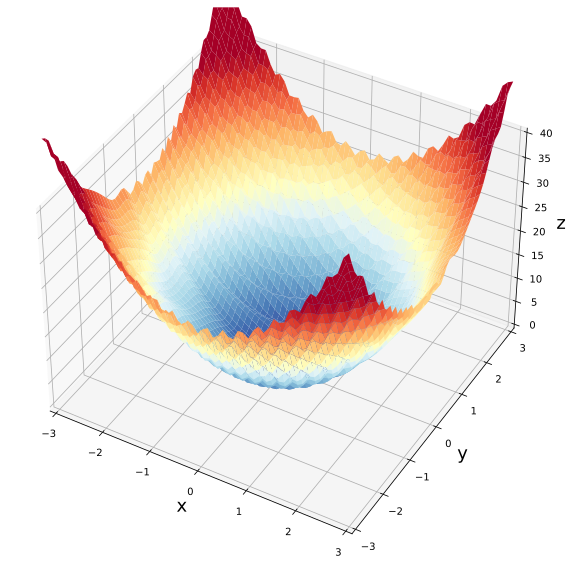

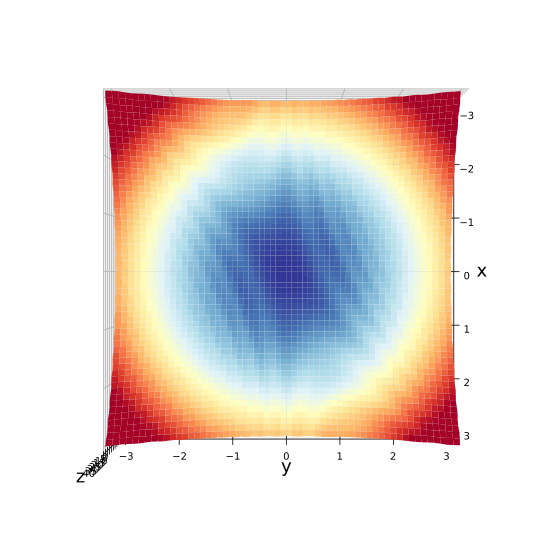

C:\Users\Alessandro\anaconda3\envs\LoCP_B\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Log scale: values of z <= 0 have been masked
  app.launch_new_instance()


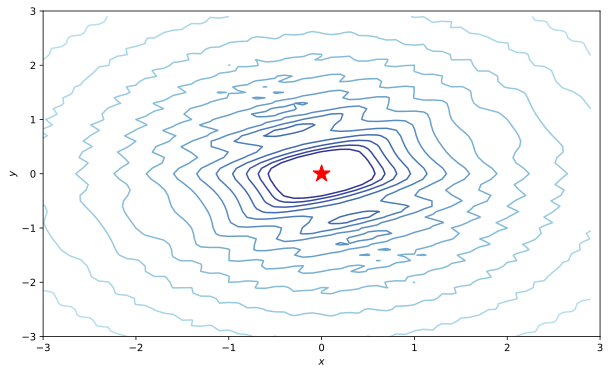

In [4]:
plt.close() # closes previous plots
x, y = np.meshgrid(np.arange(-3, 3, 0.1), np.arange(-3, 3, 0.1))
fig1,ax1=plot_surface(x,y,func(x,y,6), -60, 40)
plt.show()

fig1,ax1=plot_surface(x,y,func(x,y,6),0,90)
plt.show()

fig4,ax4 = contour_func()
plt.show()

# Functions definition

In [5]:
def gd(grad, init, n_epochs=10000, eta=0.001, noise_strength=0):
    #This is a simple optimizer
    
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0;
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        v=eta*(np.array(grad(params))+noise)
        params=params-v
        param_traj[j+1,]=params
    return param_traj

def gd_with_mom(grad, init, n_epochs=5000, eta=10**-4, gamma=0.9, noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        v=gamma*v+eta*(np.array(grad(params))+noise)
        params=params-v
        param_traj[j+1,]=params
    return param_traj

def NAG(grad, init, n_epochs=5000, eta=10**-4, gamma=0.9, noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        params_nesterov=params-gamma*v
        v=gamma*v+eta*(np.array(grad(params_nesterov))+noise)
        params=params-v
        param_traj[j+1,]=params
    return param_traj

def rms_prop(grad, init, n_epochs=5000, eta=10**-3, beta=0.9,epsilon=10**-8,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init#Import relevant packages
    grad_sq=0;
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        g=np.array(grad(params))+noise
        grad_sq=beta*grad_sq+(1-beta)*g*g
        v=eta*np.divide(g,np.sqrt(grad_sq+epsilon))
        params= params-v
        param_traj[j+1,]=params
    return param_traj
                        
                        
def adams(grad, init, n_epochs=5000, eta=10**-4, gamma=0.9, beta=0.99,epsilon=10**-8,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0;
    grad_sq=0;
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        g=np.array(grad(params))+noise
        v=gamma*v+(1-gamma)*g
        grad_sq=beta*grad_sq+(1-beta)*g*g
        v_hat=v/(1-gamma)
        grad_sq_hat=grad_sq/(1-beta)
        params=params-eta*np.divide(v_hat,np.sqrt(grad_sq_hat+epsilon))
        param_traj[j+1,]=params
    return param_traj


def cycle_gd(funcgd,grad,init,n_epochs,eta):
    
    mean_list=[]
    time_list=[]
    for epoch in n_epochs:
        
        start_time=tm.time()
        
        dist_out_list=[]
        
        for point in init:
            
            out = funcgd(grad_func,point,epoch,eta)
            
            dist=np.linalg.norm(out[-1])
            #print(dist)
            
            dist_out_list.append(dist)
            
        time_list.append(tm.time()-start_time)
        mean_list.append(sum(dist_out_list)/len(dist_out_list))
            
    return time_list, mean_list

In [6]:
X, Y = np.meshgrid(np.linspace(-3, 3, 20), np.linspace(-3, 3, 20))
XY=np.array([X.flatten(),Y.flatten()]).T
n_epochs=[10,20,50,70,100,120,150,250,300,400,500,600,750,1000,2000,3000,5000]

# $\eta$ choosing criteria 

$\eta$s are chosen trying a value in the range $\left[10^{-4}; 10^{-1} \right]$. We make the algorithms going for an epoch of $100$ iterations beginning from a point near the minima, we choose the $\eta$ that converges better in this condition.

## GD Vanilla.

C:\Users\Alessandro\anaconda3\envs\LoCP_B\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Log scale: values of z <= 0 have been masked
  This is separate from the ipykernel package so we can avoid doing imports until


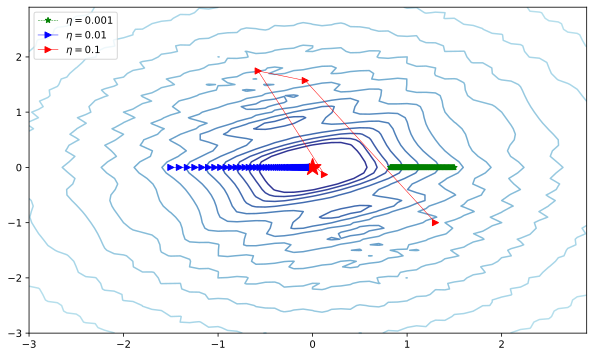

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
z=np.abs(func(x,y))
ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
ax.plot(0,0, 'r*', markersize=18)

init_fix=[1.5,0]
init_fix_1=[-1.5,0]
init_fix_2=[1.3,-1]

epoch=100

eta1=0.001
eta2=0.01 #BEST FOR GD
eta3=0.1

gd_1=gd(grad_func,init_fix, epoch, eta=eta1)
gd_2=gd(grad_func,init_fix_1, epoch, eta=eta2)
gd_3=gd(grad_func,init_fix_2, epoch, eta=eta3)

overlay_trajectory_contour(ax,gd_1,'$\eta=$%s'% eta1,'g--*', lw=0.5)
overlay_trajectory_contour(ax,gd_2,'$\eta=$%s'% eta2,'b->', lw=0.5)
overlay_trajectory_contour(ax,gd_3,'$\eta=$%s'% eta3,'r->', lw=0.5)

plt.legend(loc=2)
plt.show()

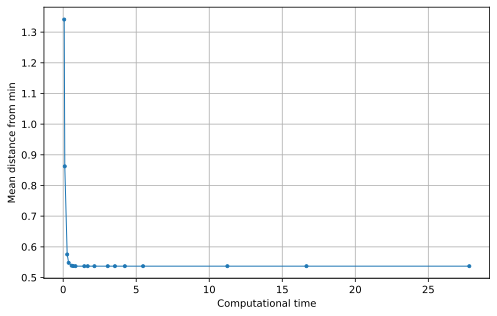

In [20]:


plt.figure(figsize=(8,5))
plt.plot(t_tot_gd,y_mean_gd,marker='o',linewidth=1, markersize=3)
plt.ylabel('Mean distance from min')
plt.xlabel('Computational time')

plt.grid()
plt.show()

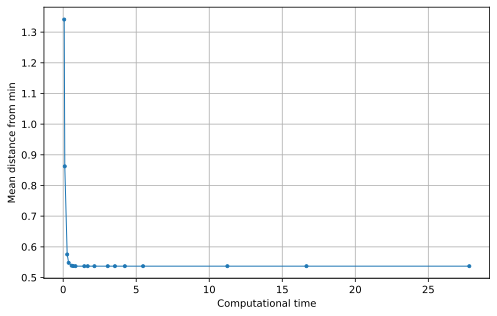

In [21]:
plt.figure(figsize=(8,5))
plt.plot(t_tot_gd,y_mean_gd,marker='o',linewidth=1, markersize=3)
plt.ylabel('Mean distance from min')
plt.xlabel('Computational time')

plt.grid()
plt.show()

## GD with momentum

C:\Users\Alessandro\anaconda3\envs\LoCP_B\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Log scale: values of z <= 0 have been masked
  This is separate from the ipykernel package so we can avoid doing imports until


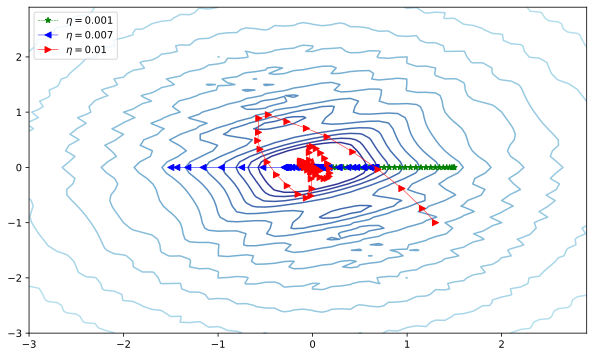

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
z=func(x,y)
ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
ax.plot(0,0, 'r*', markersize=18)

init_fix=[1.5,0]
init_fix_1=[-1.5,0]
init_fix_2=[1.3,-1]

epoch=100

eta1=0.001 
eta2=0.007
eta3=0.01 #BEST FOR NAG

gd_1=gd_with_mom(grad_func,init_fix, epoch, eta=eta1)
gd_2=gd_with_mom(grad_func,init_fix_1, epoch, eta=eta2)
gd_3=gd_with_mom(grad_func,init_fix_2, epoch, eta=eta3)

overlay_trajectory_contour(ax,gd_1,'$\eta=$%s'% eta1,'g--*', lw=0.5)
overlay_trajectory_contour(ax,gd_2,'$\eta=$%s'% eta2,'b-<', lw=0.5)
overlay_trajectory_contour(ax,gd_3,'$\eta=$%s'% eta3,'r->', lw=0.5)

plt.legend(loc=2)
plt.show()

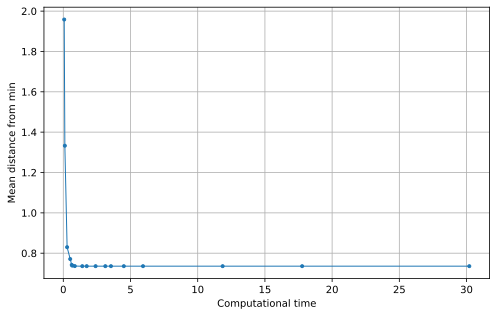

In [22]:


plt.figure(figsize=(8,5))
plt.plot(t_tot_gdm,y_mean_gdm,marker='o',linewidth=1, markersize=3)
plt.ylabel('Mean distance from min')
plt.xlabel('Computational time')

plt.grid()
plt.show()

##  NAG

C:\Users\Alessandro\anaconda3\envs\LoCP_B\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Log scale: values of z <= 0 have been masked
  This is separate from the ipykernel package so we can avoid doing imports until


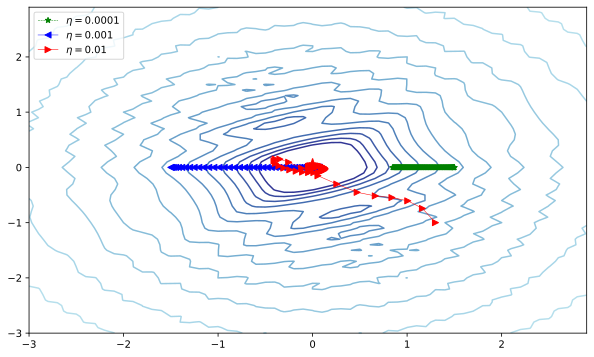

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
z=func(x,y)
ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
ax.plot(0,0, 'r*', markersize=18)

init_fix=[1.5,0]
init_fix_1=[-1.5,0]
init_fix_2=[1.3,-1]
epoch=100

eta1=0.0001
eta2=0.001 #BEST FOR NAG
eta3=0.01

gd_1=NAG(grad_func,init_fix, epoch, eta=eta1)
gd_2=NAG(grad_func,init_fix_1, epoch, eta=eta2)
gd_3=NAG(grad_func,init_fix_2, epoch, eta=eta3)

overlay_trajectory_contour(ax,gd_1,'$\eta=$%s'% eta1,'g--*', lw=0.5)
overlay_trajectory_contour(ax,gd_2,'$\eta=$%s'% eta2,'b-<', lw=0.5)
overlay_trajectory_contour(ax,gd_3,'$\eta=$%s'% eta3,'r->', lw=0.5)

plt.legend(loc=2)
plt.show()

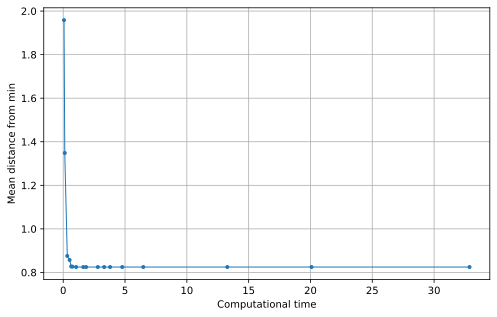

In [24]:

plt.figure(figsize=(8,5))
plt.plot(t_tot_nag,y_mean_nag,marker='o',linewidth=1, markersize=3)
plt.ylabel('Mean distance from min')
plt.xlabel('Computational time')

plt.grid()
plt.show()

##  RMSprop

C:\Users\Alessandro\anaconda3\envs\LoCP_B\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Log scale: values of z <= 0 have been masked
  This is separate from the ipykernel package so we can avoid doing imports until


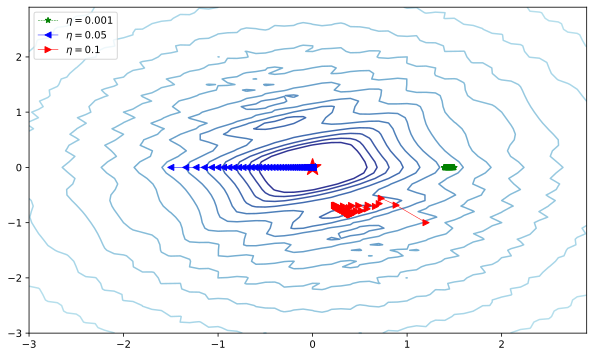

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
z=func(x,y)
ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
ax.plot(0,0, 'r*', markersize=18)

init_fix=[1.5,0]
init_fix_1=[-1.5,0]
init_fix_2=[1.2,-1]
epoch=100

eta1=0.001
eta2=0.05#BEST FOR GD
eta3=0.1


gd_1=rms_prop(grad_func, init_fix, epoch, eta1)
gd_2=rms_prop(grad_func, init_fix_1, epoch, eta2)
gd_3=rms_prop(grad_func, init_fix_2, epoch, eta3)

overlay_trajectory_contour(ax,gd_1,'$\eta=$%s'% eta1,'g--*', lw=0.5)
overlay_trajectory_contour(ax,gd_2,'$\eta=$%s'% eta2,'b-<', lw=0.5)
overlay_trajectory_contour(ax,gd_3,'$\eta=$%s'% eta3,'r->', lw=0.5)

plt.legend(loc=2)
plt.show()

In [14]:

plt.figure(figsize=(8,5))
plt.plot(t_tot_rms,y_mean_rms,marker='o',linewidth=1, markersize=3)
plt.ylabel('Mean distance from min')
plt.xlabel('Computational time')

plt.grid()
plt.show()

NameError: name 't_tot_rms' is not defined

<Figure size 576x360 with 0 Axes>

## ADAM

C:\Users\Alessandro\anaconda3\envs\LoCP_B\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Log scale: values of z <= 0 have been masked
  This is separate from the ipykernel package so we can avoid doing imports until


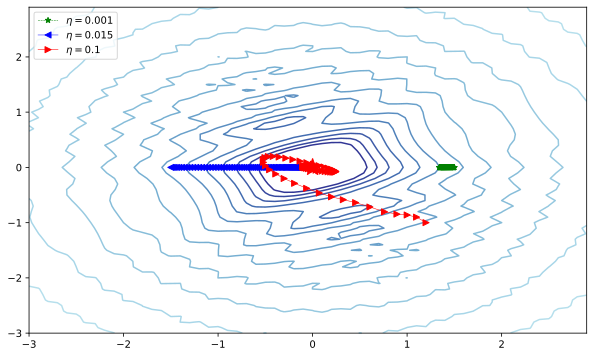

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
z=func(x,y)
ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
ax.plot(0,0, 'r*', markersize=18)

init_fix=[1.5,0]
init_fix_1=[-1.5,0]
init_fix_2=[1.2,-1]
epoch=100

eta1=0.001
eta2=0.015 #BEST FOR GD
eta3=0.1


gd_1=adams(grad_func,init_fix, epoch, eta=eta1)
gd_2=adams(grad_func,init_fix_1, epoch, eta=eta2)
gd_3=adams(grad_func,init_fix_2, epoch, eta=eta3)

overlay_trajectory_contour(ax,gd_1,'$\eta=$%s'% eta1,'g--*', lw=0.5)
overlay_trajectory_contour(ax,gd_2,'$\eta=$%s'% eta2,'b-<', lw=0.5)
overlay_trajectory_contour(ax,gd_3,'$\eta=$%s'% eta3,'r->', lw=0.5)

plt.legend(loc=2)
plt.show()

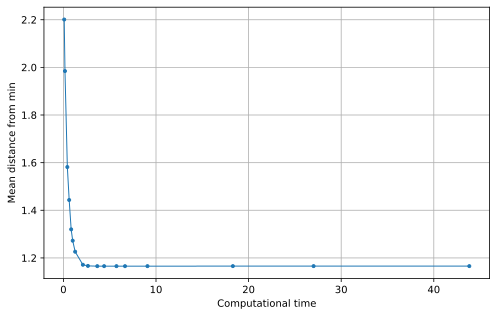

In [25]:


plt.figure(figsize=(8,5))
plt.plot(t_tot_adam,y_mean_adam,marker='o',linewidth=1, markersize=3)
plt.ylabel('Mean distance from min')
plt.xlabel('Computational time')

plt.grid()
plt.show()

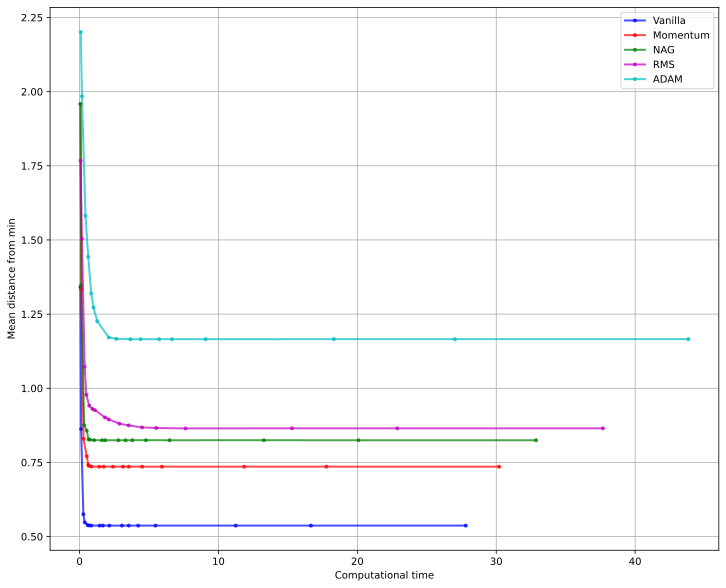

In [26]:
plt.figure(figsize=(12,10))
plt.plot(t_tot_gd,y_mean_gd,marker='o',linewidth=2, markersize=3, color='b', label='Vanilla', alpha=0.7)
plt.plot(t_tot_gdm,y_mean_gdm,marker='o',linewidth=2, markersize=3, color='r',label='Momentum',alpha=0.7)
plt.plot(t_tot_nag,y_mean_nag,marker='o',linewidth=2, markersize=3, color='g',label='NAG',alpha=0.7)
plt.plot(t_tot_rms,y_mean_rms,marker='o',linewidth=2, markersize=3, color='m',label='RMS',alpha=0.7)
plt.plot(t_tot_adam,y_mean_adam,marker='o',linewidth=2, markersize=3, color='c',label='ADAM',alpha=0.7)
plt.ylabel('Mean distance from min')
plt.xlabel('Computational time')

plt.legend()

plt.grid()
plt.show()

## Cella sgravata che ci mette un boato a compilare


In [19]:
########### GD ######################

t_tot_gd,y_mean_gd=cycle_gd(gd,grad_func,XY,n_epochs,eta=0.01)

########### GD + momentum ###########

t_tot_gdm,y_mean_gdm=cycle_gd(gd_with_mom,grad_func,XY,n_epochs,eta=0.001)

########### NAG #####################

t_tot_nag,y_mean_nag=cycle_gd(NAG,grad_func,XY,n_epochs,eta=0.001)

########### RMS_prop ################

t_tot_rms,y_mean_rms=cycle_gd(rms_prop,grad_func,XY,n_epochs,eta=0.05)

########### ADAM ###################

t_tot_adam,y_mean_adam=cycle_gd(adams,grad_func,XY,n_epochs,eta=0.015)

# Some analysis on the mean distance

In [ ]:
f, (ax1,ax2,ax3,ax4) = plt.subplots(1,2,figsize=(2.5,4))


axs1.plot(t_tot_rms,y_mean_rms,marker='o',linewidth=1, markersize=3)
axs1.ylabel('Mean distance from min')
axs1.xlabel('Computational time')

axs1.grid()
axs1.show()

In [ ]:
axs